In [1]:
%pylab inline
#from ipywidgets import *
from IPython.html.widgets import *

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
S0=matrix([[1,0],[0,1]])
S1=matrix([[0,1],[1,0]])
S2=matrix([[0,-1j],[1j,0]])
S3=matrix([[1,0],[0,-1]])
N=zeros_like(S0);
I=1.j

In [3]:
def matafn(h):
    'Array flatten a matrix list of appropriate dimensions'
    H=hstack(h[0])
    for sor in range(1,len(h)):
        H=vstack([H,hstack(h[sor])])
    return H

In [4]:
a1=matrix([[sqrt(3)],
           [1]])/2
a2=matrix([[-sqrt(3)],
           [1]])/2

def ham(kx,ky,t1,t2,t3,m,mz):
    k=matrix([[kx,ky]])
    U=matafn([[N,N,N,N,t2*S0,t3*S0],
              [N,N,N,t2*S0,t3*S0,N],
              [N,N,N,t3*S0,N,t2*S0],
              [N,t2*S0,t3*S0,N,N,N],
              [t2*S0,t3*S0,N,N,N,N],
              [t3*S0,N,t2*S0,N,N,N]])
    T1=matafn([[N,N,N,N,N,N],
          [N,N,N,N,N,t1*S0+I*mz*S3+I*m/2*(-1*S1+sqrt(3)*S2)],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
    T2=matafn([[N,N,N,t1*S0+I*mz*S3+I*m/2*(-1*S1-sqrt(3)*S2),N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
    T3=matafn([[N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,t1*S0+I*mz*S3+I*m*S1,N,N,N],
          [N,N,N,N,N,N]])
    H=U+exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3+\
    (exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3).H
    
    return H

In [5]:
krany=linspace(-2*pi,0,300)/50
kranx=linspace(0,2*pi/sqrt(3),240)/50
kran=append(krany,kranx)

In [6]:
def play(m=0,mz=0,t1=3):
    dat=[]
    for kk in krany:
        dat.append(eigvalsh(ham(0,kk,t1,3,3,m,mz)))
    for kk in kranx:
        dat.append(eigvalsh(ham(kk,0,t1,3,3,m,mz)))
    plot(kran,dat,'k-');
    grid()
    xlim(-2*pi,2*pi/sqrt(3));
    xticks([-2*pi,-4*pi/3,0,2*pi/sqrt(3)],[r'$M$',r'$K$',r'$\Gamma$',r'$M$'],fontsize=40);
    #yticks(linspace(-9,9,7),list(map(lambda x:r"$"+str(x)+r"\gamma_0$" ,(arange(-3,4)) )),fontsize=30)
    ylim(-0.025,0.025);
    xlim(-0.1,0.1);

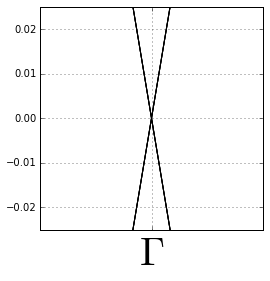

In [7]:
figsize(4,4)
interact(play,m=(-.5,.5,0.001),mz=(-.5,.5,0.001),t1=(2.9,3.1,0.001));

In [8]:
def wilson_loop(hamfun,*hamargs,
                b1=array([2*pi,0]),
                b2=array([0,2*pi]),
                p1ran=linspace(0,0.5,100),
                p2ran=linspace(0,1,7,endpoint=False),
                **kwargs):
    '''
    Calculating Z2 invariant via Wilson loops of slices 
    of the occupied bands in k-space,
    given a function hamfun(kx,ky,*hamargs)
    and k space reciprocal lattice vectors b1,b2.
    '''
    dim=len(hamfun(0,0,*hamargs))
    dat=[]
    for p1 in p1ran:
        WL=eye(dim)
        for p2 in p2ran:
            kx=(p1*b1+p2*b2)[0]
            ky=(p1*b1+p2*b2)[1]
            H=hamfun(kx,ky,*hamargs)
            eigdat=eigh(H);
            P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H
            WL=P*WL
        weig=eig(WL);
        indx=where(abs(weig[0])>10**-10)[0]
        dat.append(sort(angle(weig[0][indx])))       
        
    return  (p1ran,dat)

In [31]:
ran,dat=wilson_loop(ham,*[3.0,3.0,3,0.231,0.],
                    b1=array([-2*pi/sqrt(3),2*pi]),
                    b2=array([2*pi/sqrt(3),2*pi]),
                   p1ran=linspace(0.0,0.5,500))

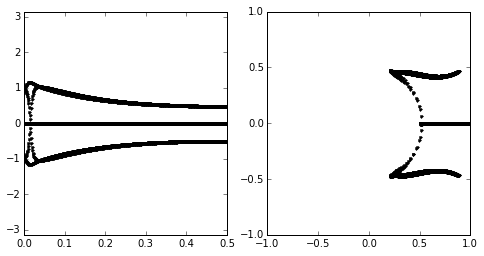

In [32]:
subplot(121)
plot(ran,dat,'k.');
ylim(-pi,pi);
subplot(122)
for i in range(6):
    plot((ran+0.5)*cos(array(dat)[:,i]),
         (ran+0.5)*sin(array(dat)[:,i]),'k.')
xlim(-1,1)
ylim(-1,1);

In [11]:
a1=matrix([[sqrt(3)],
           [1]])/2
a2=matrix([[-sqrt(3)],
           [1]])/2

def ham_2nn(kx,ky,m,mz):  
    t=1;
    t1=t
    t2=t
    t3=t
    k=matrix([[kx,ky]])
    A1=I*m/2*(-S1+sqrt(3)*S2);
    A2=I*m/2*(-S1-sqrt(3)*S2);
    U=matafn([[N,I*mz*S3,-I*mz*S3,  N,t2*S0,t3*S0+I*m*S1],
              [-I*mz*S3,N,I*mz*S3,  t2*S0,t3*S0+A1,N],
              [I*mz*S3,-I*mz*S3,N,  t3*S0+A2,N,t2*S0],
              [N,t2*S0,t3*S0+A2.H,  N,-I*mz*S3,I*mz*S3],
              [t2*S0,t3*S0+A1.H,N,  I*mz*S3,N,-I*mz*S3],
              [t3*S0-I*m*S1,N,t2*S0,  -I*mz*S3,I*mz*S3,N]])
    T1=matafn([[N,N,N,N,N,N],
               [N,N,N,N,N,t1*S0],
               [N,N,N,N,N,N],
               [N,N,N,N,N,N],
               [N,N,N,N,N,N],
               [N,N,N,N,N,N]])
    T2=matafn([[N,N,N,t1*S0,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N]])
    T3=matafn([[N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,N,N,N,N],
          [N,N,t1*S0,N,N,N],
          [N,N,N,N,N,N]])
    
    H=U+exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3+\
    (exp(I*(k*a1)[0,0])*T1+exp(I*(k*a2)[0,0])*T2+exp(I*(k*(a1+a2))[0,0])*T3).H
    
    return H

In [12]:
krany=linspace(-2*pi,0,300)
kranx=linspace(0,2*pi/sqrt(3),240)
kran=append(krany,kranx)

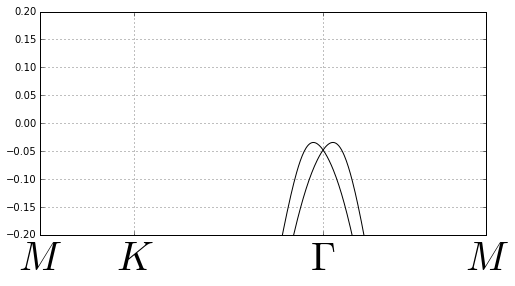

In [13]:
@interact(m=(-1,1,0.01),mz=(0,.2,0.001))
def play_2nn(m=0.2,mz=0):
    dat=[]
    for kk in krany:
        dat.append(eigvalsh(ham_2nn(0,kk,m,mz)))
    for kk in kranx:
        dat.append(eigvalsh(ham_2nn(kk,0,m,mz)))
    plot(kran,dat,'k-');
    grid()
    xlim(-2*pi,2*pi/sqrt(3));
    xticks([-2*pi,-4*pi/3,0,2*pi/sqrt(3)],[r'$M$',r'$K$',r'$\Gamma$',r'$M$'],fontsize=40);
    #yticks(linspace(-9,9,7),list(map(lambda x:r"$"+str(x)+r"\gamma_0$" ,(arange(-3,4)) )),fontsize=30)
    ylim(-.2,.2);
    #xlim(-0.1,0.1);

In [16]:
ran,dat=wilson_loop(ham_2nn,*[0.74,0.076],
                    b1=2*pi*array([1/sqrt(3),1]),
                    b2=2*pi*array([-1/sqrt(3),1]),
                    p1ran=log(logspace(0.000001,.5,1000,base=exp(1))))


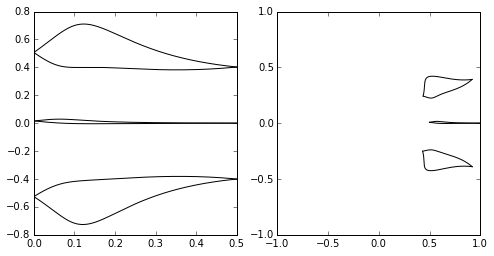

In [17]:
figsize(8,4)
subplot(121)
plot(ran,dat,'k-');
subplot(122)
for i in range(6):
    plot((ran+0.5)*cos(array(dat)[:,i]),
         (ran+0.5)*sin(array(dat)[:,i]),'k-')
xlim(-1,1)
ylim(-1,1);

In [18]:
ran,dat=wilson_loop(ham_2nn,*[0.0,0.03],
                    b1=2*pi*array([1/sqrt(3),1]),
                    b2=2*pi*array([-1/sqrt(3),1]),
                    p1ran=log(logspace(0.000001,.5,1000,base=exp(1))))


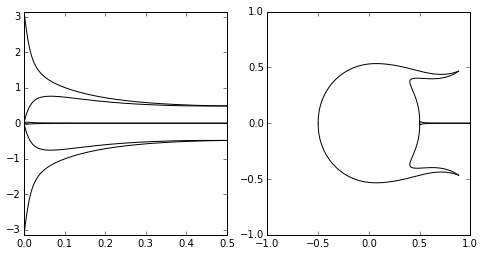

In [20]:
figsize(8,4)
subplot(121)
plot(ran,dat,'k-');
ylim(-pi,pi)
subplot(122)
for i in range(6):
    plot((ran+0.5)*cos(array(dat)[:,i]),
         (ran+0.5)*sin(array(dat)[:,i]),'k-')
xlim(-1,1)
ylim(-1,1);